<a href="https://colab.research.google.com/github/codester2228/cfsol/blob/master/Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
    # load libraries
    import pandas as pd
    import numpy as np
    from sklearn.datasets import load_iris
    import seaborn as sns
    import matplotlib.pyplot as plt

    iris = load_iris()

    # Create features and target
    X = iris.data
    y = iris.target

    # Convert feature matrix into DataFrame
    df = pd.DataFrame(X)
    df.shape




(150, 4)

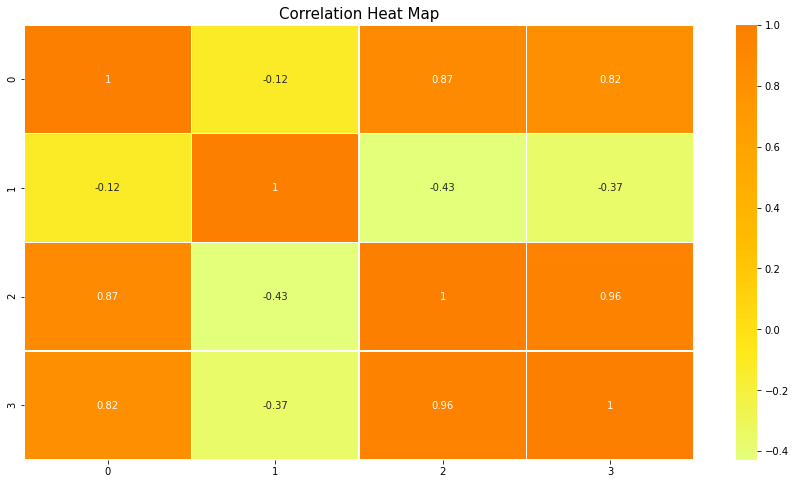

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df.corr(),annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15) #shows how much one parameter depends on the another(-1 to 1)
plt.show()

In [ ]:
corr_matrix=df.corr().abs()  #original corr matrix, method is pearson by default
mask =np.triu(np.ones_like(corr_matrix,dtype=bool))  #mask to remove upper half of the diagonal since symmetric along diagonal and we want to remove one column for one corr. value
corr_masked=corr_matrix.mask(mask)        #apply mask on matrix

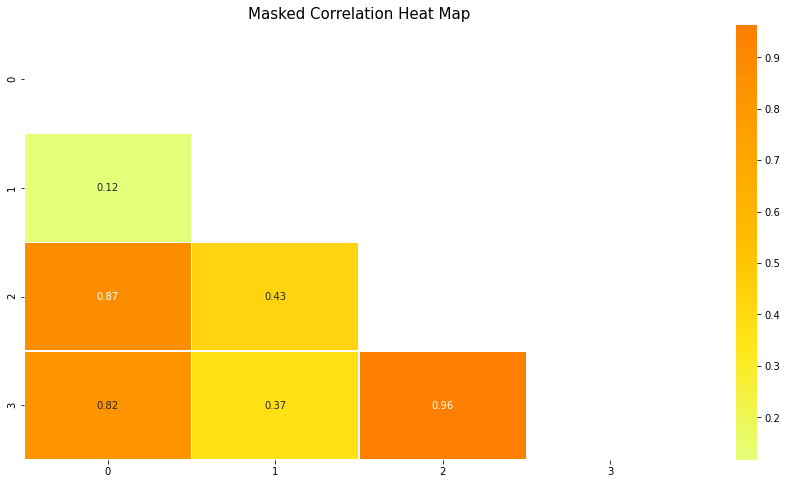

In [ ]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(corr_masked,annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Masked Correlation Heat Map', fontsize = 15) #masked heatmap of corr matrix
plt.show()

In [ ]:
to_drop = [column for column in corr_masked.columns if any(corr_masked[column] > 0.85)] #selects column which have corr value >0.85 
print(to_drop) #columns to remove

[0, 2]


In [ ]:
# Drop Marked Features
newdf1 = df.drop(df.columns[to_drop], axis=1)
print(newdf1)

       1    3
0    3.5  0.2
1    3.0  0.2
2    3.2  0.2
3    3.1  0.2
4    3.6  0.2
..   ...  ...
145  3.0  2.3
146  2.5  1.9
147  3.0  2.0
148  3.4  2.3
149  3.0  1.8

[150 rows x 2 columns]


In [ ]:
def drop_corr(df):    #required function for dropping corr columns
  corr_matrix=df.corr().abs()  #original corr matrix, method is pearson by default
  mask =np.triu(np.ones_like(corr_matrix,dtype=bool))  #mask to remove upper half of the diagonal since symmetric along diagonal and we want to remove one column for one corr. value
  corr_masked=corr_matrix.mask(mask)        #apply mask on matrix
  to_drop = [column for column in corr_masked.columns if any(corr_masked[column] > 0.85)] #selects column which have corr value >0.85
  newdf2 = df.drop(df.columns[to_drop], axis=1)
  print(newdf2)


In [ ]:
print(df) #before

       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]


In [ ]:
drop_corr(df) #after

       1    3
0    3.5  0.2
1    3.0  0.2
2    3.2  0.2
3    3.1  0.2
4    3.6  0.2
..   ...  ...
145  3.0  2.3
146  2.5  1.9
147  3.0  2.0
148  3.4  2.3
149  3.0  1.8

[150 rows x 2 columns]
